In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [3]:
df = pd.read_csv('loan.csv')

In [4]:
df.shape

(39717, 111)

In [5]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


# <span style="background: green; color: white; padding: 5px">Data cleaning

## Fixing rows and columns

##### Checking for null columns

In [6]:
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

##### Dropping all columns having only null values

In [7]:
df.dropna(axis=1, how='all', inplace=True)

In [8]:
df.shape

(39717, 57)

In [9]:
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

##### Additional columns to be removed
- Columns like next_pymnt_d, mths_since_last_record, mths_since_last_delinq have too many null values hence they are useless
- desc, emp_title, url, title are of no use in this case
- collections_12_mths_ex_med, chargeoff_within_12_mths, tax_liens columns have only 0 and NA
- last_pymnt_d, last_credit_pull_d are also of no use in this case

In [10]:
df.drop(columns=['next_pymnt_d', 'mths_since_last_record', 'mths_since_last_delinq', 'desc', 'emp_title', 'url', 'title', 'collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'tax_liens', 'last_pymnt_d', 'last_credit_pull_d'], axis=1, inplace=True)

In [11]:
df.isnull().sum()

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                 1075
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
purpose                       0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                   50
total_acc                     0
initial_list_status           0
out_prncp                     0
out_prnc

##### Searching for columns having only one unique value
These columns can be droped because there cannot be any analysis done

In [12]:
df.drop(columns = [c for c in list(df) if len(df[c].unique()) == 1], axis=1, inplace=True)

In [13]:
df.isnull().sum()

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                 1075
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
purpose                       0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                   50
total_acc                     0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_py

## Missing values
###### emp_length

For 'emp_length' column lets assume 0 as less than 1 year and 10 >= 10 years, other numbers remain as it is

In [14]:
df.emp_length.value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [15]:
df.emp_length.unique()[:-1]

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years'],
      dtype=object)

In [16]:
df = df.replace(df.emp_length.unique()[:-1], [10, 0, 1, 3, 8, 9, 4, 5, 6, 2, 7])

In [17]:
df.emp_length.describe()

count    38642.000000
mean         4.973449
std          3.562580
min          0.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         10.000000
Name: emp_length, dtype: float64

Since mean and median of the emp_length are almost equal, filling up the missing values by 4

In [18]:
df.emp_length.fillna(4, inplace=True)

In [19]:
df.isnull().sum()

id                           0
member_id                    0
loan_amnt                    0
funded_amnt                  0
funded_amnt_inv              0
term                         0
int_rate                     0
installment                  0
grade                        0
sub_grade                    0
emp_length                   0
home_ownership               0
annual_inc                   0
verification_status          0
issue_d                      0
loan_status                  0
purpose                      0
zip_code                     0
addr_state                   0
dti                          0
delinq_2yrs                  0
earliest_cr_line             0
inq_last_6mths               0
open_acc                     0
pub_rec                      0
revol_bal                    0
revol_util                  50
total_acc                    0
out_prncp                    0
out_prncp_inv                0
total_pymnt                  0
total_pymnt_inv              0
total_re

##### pub_rec_bankruptcies       

In [26]:
df.pub_rec_bankruptcies.describe()

count    39020.000000
mean         0.043260
std          0.204324
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: pub_rec_bankruptcies, dtype: float64

Since mean and median are nearly same i.e. 0, replacing null vlaues by 0

In [27]:
df.pub_rec_bankruptcies.fillna(0, inplace=True)

In [28]:
df.isnull().sum()

id                         0
member_id                  0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
zip_code                   0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
total_rec_late

##### home_ownership             

In [29]:
df.home_ownership.value_counts()

RENT        18899
MORTGAGE    17659
OWN          3058
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

As per data dictionary, there are only 4 values for home ownership RENT, MORTGAGE, OWN, OTHER.
Also, RENT has maximum count. Hence, replacing 3 NONE values with RENT

In [30]:
df.home_ownership = df.home_ownership.replace("NONE", 'RENT')

## Standardizing values

##### revol_util

In [20]:
df.revol_util.value_counts()

0%        977
0.20%      63
63%        62
40.70%     58
66.70%     58
         ... 
25.74%      1
47.36%      1
24.65%      1
10.61%      1
7.28%       1
Name: revol_util, Length: 1089, dtype: int64

Changing values to float

In [21]:
df.revol_util = df.revol_util.apply(lambda x: x if type(x) == float else float(x[:-1]))

In [22]:
df.revol_util.describe()

count    39667.000000
mean        48.832152
std         28.332634
min          0.000000
25%         25.400000
50%         49.300000
75%         72.400000
max         99.900000
Name: revol_util, dtype: float64

Since there is not much difference between mean and median, replacing null values with mean

In [23]:
df.revol_util.fillna(df.revol_util.mean(), inplace=True)

##### int_rate
Similarly converting interest rate to float

In [24]:
df.int_rate = df.int_rate.apply(lambda x: x if type(x) == float else float(x[:-1]))

In [25]:
df.isnull().sum()

id                           0
member_id                    0
loan_amnt                    0
funded_amnt                  0
funded_amnt_inv              0
term                         0
int_rate                     0
installment                  0
grade                        0
sub_grade                    0
emp_length                   0
home_ownership               0
annual_inc                   0
verification_status          0
issue_d                      0
loan_status                  0
purpose                      0
zip_code                     0
addr_state                   0
dti                          0
delinq_2yrs                  0
earliest_cr_line             0
inq_last_6mths               0
open_acc                     0
pub_rec                      0
revol_bal                    0
revol_util                   0
total_acc                    0
out_prncp                    0
out_prncp_inv                0
total_pymnt                  0
total_pymnt_inv              0
total_re

##### The current loans are not going to help in analysis. Hence dropping the same

In [31]:
df = df[df.loan_status != 'Current']

## Removing outliers

#### Total income

<AxesSubplot:>

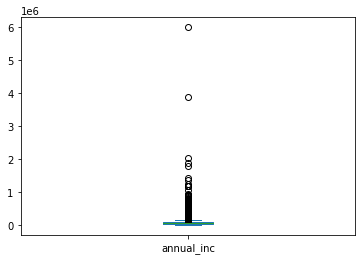

In [32]:
df.annual_inc.plot.box()

In [33]:
#Removing outliers based on 95 percentile rule
df = df[df.annual_inc <= df.annual_inc.quantile(0.95)]

<AxesSubplot:>

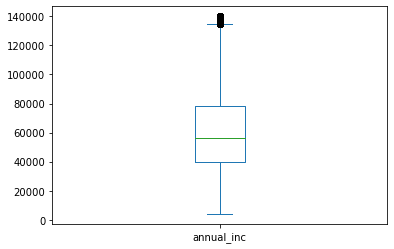

In [34]:
df.annual_inc.plot.box()

#### Loan amount

<AxesSubplot:>

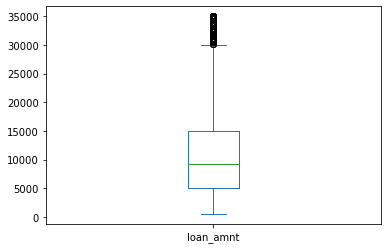

In [35]:
df.loan_amnt.plot.box()

There are not many outlier hence keeping the records same

In [36]:
df.loan_amnt.quantile(0.95)

25000.0

## Deriving values

#### Month and year from date 

In [37]:
#Converting mmm-yy to date
pd.to_datetime(df.issue_d, format='%b-%y')

0       2011-12-01
1       2011-12-01
2       2011-12-01
3       2011-12-01
5       2011-12-01
           ...    
39711   2007-07-01
39712   2007-07-01
39713   2007-07-01
39714   2007-07-01
39716   2007-06-01
Name: issue_d, Length: 36654, dtype: datetime64[ns]

In [38]:
df['issue_month']=df.issue_d.apply(lambda x: dt.datetime.strptime(x, '%b-%y').month)

In [39]:
df['issue_year']=df.issue_d.apply(lambda x: dt.datetime.strptime(x, '%b-%y').year)

#### Savings from installment and monthly income

In [40]:
df['monthly_savings']=(df.annual_inc / 12) - df.installment

In [41]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,issue_month,issue_year,monthly_savings
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,5000.00,863.16,0.00,0.00,0.00,171.62,0.0,12,2011,1837.13
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,456.46,435.17,0.00,117.08,1.11,119.66,0.0,12,2011,2440.17
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,2400.00,605.67,0.00,0.00,0.00,649.91,0.0,12,2011,936.67
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,10000.00,2214.92,16.97,0.00,0.00,357.48,0.0,12,2011,3760.69
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,...,5000.00,632.21,0.00,0.00,0.00,161.03,0.0,12,2011,2843.54


In [42]:
df.shape

(36654, 42)

## Exploring Columns

In [43]:
df.iloc[0:7, 0:12]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10.0,RENT
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,0.0,RENT
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10.0,RENT
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10.0,RENT
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3.0,RENT
6,1069639,1304742,7000,7000,7000.0,60 months,15.96,170.08,C,C5,8.0,RENT
7,1072053,1288686,3000,3000,3000.0,36 months,18.64,109.43,E,E1,9.0,RENT


In [44]:
df.iloc[0:7, 12:24]

,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc
0,24000.0,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,0,Jan-85,1,3
1,30000.0,Source Verified,Dec-11,Charged Off,car,309xx,GA,1.00,0,Apr-99,5,3
2,12252.0,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72,0,Nov-01,2,2
3,49200.0,Source Verified,Dec-11,Fully Paid,other,917xx,CA,20.00,0,Feb-96,1,10
5,36000.0,Source Verified,Dec-11,Fully Paid,wedding,852xx,AZ,11.20,0,Nov-04,3,9
6,47004.0,Not Verified,Dec-11,Fully Paid,debt_consolidation,280xx,NC,23.51,0,Jul-05,1,7
7,48000.0,Source Verified,Dec-11,Fully Paid,car,900xx,CA,5.35,0,Jan-07,2,4


In [45]:
df.iloc[0:7, 24:36]

,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries
0,0,13648,83.7,9,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00
1,0,1687,9.4,4,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08
2,0,2956,98.5,10,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00
3,0,5598,21.0,37,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00
5,0,7963,28.3,12,0.0,0.0,5632.210000,5632.21,5000.00,632.21,0.00,0.00
6,0,17726,85.6,11,0.0,0.0,10110.840000,10110.84,6985.61,3125.23,0.00,0.00
7,0,8221,87.5,4,0.0,0.0,3939.135294,3939.14,3000.00,939.14,0.00,0.00


In [47]:
df.iloc[0:7, 36:48]

,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,issue_month,issue_year,monthly_savings
0,0.00,171.62,0.0,12,2011,1837.13
1,1.11,119.66,0.0,12,2011,2440.17
2,0.00,649.91,0.0,12,2011,936.67
3,0.00,357.48,0.0,12,2011,3760.69
5,0.00,161.03,0.0,12,2011,2843.54
6,0.00,1313.76,0.0,12,2011,3746.92
7,0.00,111.34,0.0,12,2011,3890.57


# <span style="background: green; color: white; padding: 5px"> Univariate analysis

##### purpose

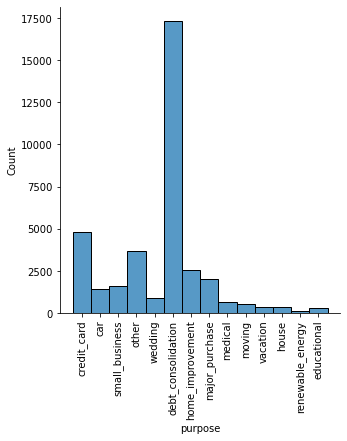

In [48]:
sns.displot(df, x="purpose")
plt.xticks(rotation=90)
plt.show()

<span style= 'background:yellow'>Based on above chart, debt_consolidation is major reason for taking loan.</span>

##### issue_year

<AxesSubplot:>

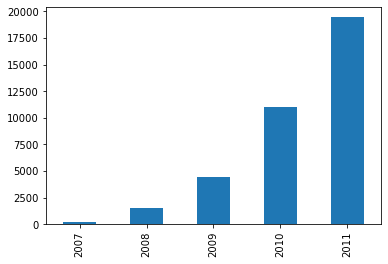

In [56]:
df.issue_year.value_counts().sort_index().plot.bar()

<span style= 'background:yellow'>Based on above chart, most of the loans are from year 2011. Maybe because of recession.</span>

##### issue_month

<AxesSubplot:>

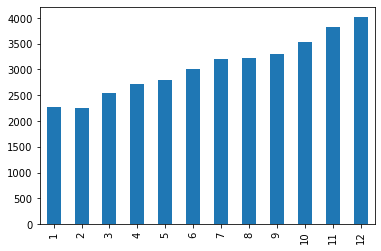

In [51]:
df.issue_month.value_counts().sort_index().plot.bar()

<span style= 'background:yellow'>Based on above chart, most of the loans are taken in the month of December.</span>

##### loan_amnt

<AxesSubplot:xlabel='loan_amnt', ylabel='Count'>

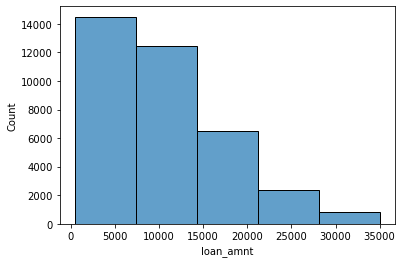

In [50]:
sns.histplot(df, x="loan_amnt", bins=5, alpha=0.7)

<span style= 'background:yellow'>People are mostly applying for lower loan amounts.</span>

##### annual_inc

<AxesSubplot:xlabel='annual_inc', ylabel='Count'>

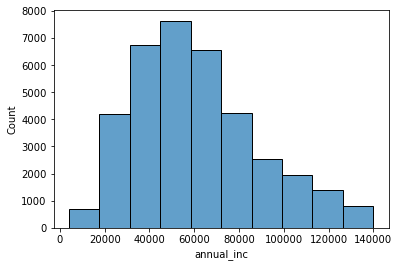

In [53]:
sns.histplot(df, x="annual_inc", bins=10, alpha=0.7)

<span style= 'background:yellow'>Most of the loans are taken by people whos annual income is in middle.</span>

##### home_ownership

<AxesSubplot:>

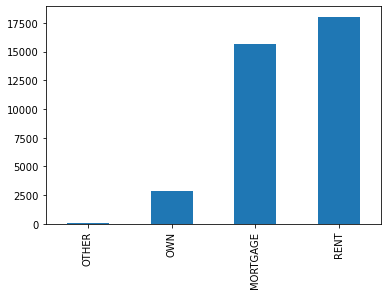

In [60]:
df.home_ownership.value_counts().sort_values().plot.bar()

<span style= 'background:yellow'>People who have rented or mortgaged home are majorly applying for loan</span>

##### dti

<AxesSubplot:xlabel='dti', ylabel='Count'>

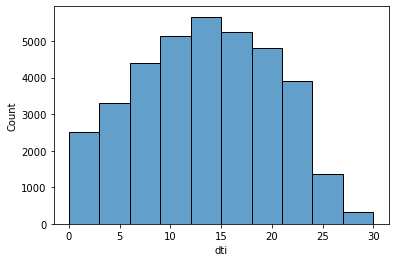

In [61]:
sns.histplot(df, x="dti", bins=10, alpha=0.7)

<span style= 'background:yellow'>Load applications are high in dti range 9 - 17. Also there is a major drop as dti goes beyond 24.</span>

##### pub_rec_bankruptcies

In [95]:
df.pub_rec_bankruptcies.describe()

count    36654.000000
mean         0.043897
std          0.205533
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: pub_rec_bankruptcies, dtype: float64

<AxesSubplot:xlabel='pub_rec_bankruptcies', ylabel='Count'>

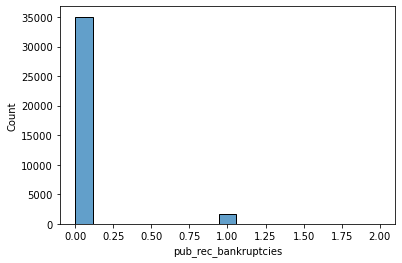

In [96]:
sns.histplot(df, x="pub_rec_bankruptcies", alpha=0.7)

<span style= 'background:yellow'>pub_rec_bankruptcies is not a valid parameter as it is completely zeros except two outliers

# <span style="background: green; color: white; padding: 5px"> Bivariate analysis

##### Exploring correlation between Loan Amnt and Int. Rate

In [62]:
df_amnt_vs_int = df[['loan_amnt', 'int_rate']]
df_amnt_vs_int.head()

,loan_amnt,int_rate
0,5000,10.65
1,2500,15.27
2,2400,15.96
3,10000,13.49
5,5000,7.90


<AxesSubplot:xlabel='loan_amnt', ylabel='int_rate'>

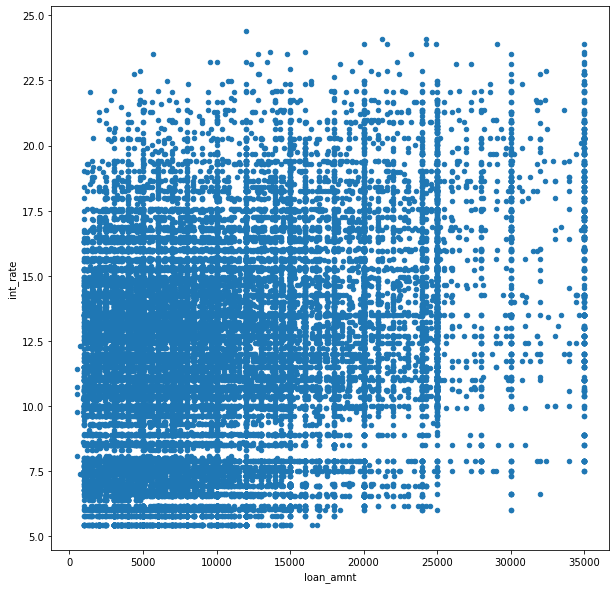

In [63]:
df_amnt_vs_int.plot.scatter(x = 'loan_amnt', y = 'int_rate', figsize=(10, 10))

In [64]:
df_amnt_vs_int.corr(method ='pearson')

,loan_amnt,int_rate
loan_amnt,1.000000,0.291189
int_rate,0.291189,1.000000


<span style= 'background:yellow'>Correlation is 0.3% between Loan Amount and Int. Rate. Can be omitted from further analysis.

#### Creating a common function to analyse categorical features

In [83]:
def analyse_cat_param(df, param_name):
    #creating the required pivot table for counting loans in each category
    df_temp_pivot = pd.pivot_table(df, index=param_name, columns='loan_status', values='member_id',  aggfunc='count').reset_index()
    # based on the count computing percentage to get clear idea of the distribution
    df_temp_pivot['Ch_O_%'] = round((df_temp_pivot['Charged Off']/( df_temp_pivot['Fully Paid']+ df_temp_pivot['Charged Off'])*100),2)
    df_temp_pivot['FP_%'] = round((df_temp_pivot['Fully Paid']/( df_temp_pivot['Fully Paid']+ df_temp_pivot['Charged Off'])*100),2)
    df_temp_pivot.set_index(param_name)
    #group by is neccessary to bring back the category names else index would be shown as x label
    df_temp_pivot = df_temp_pivot.groupby(by=param_name).sum().sort_values(by=['Ch_O_%'], ascending = False)
    print(df_temp_pivot)
    #generating the graph
    df_temp_pivot[['Ch_O_%', 'FP_%']].plot.bar(stacked = True, figsize=(10, 5))

##### Loan status and purpose

loan_status         Charged Off  Fully Paid  Ch_O_%   FP_%
purpose                                                   
small_business              454        1169   27.97  72.03
renewable_energy             18          77   18.95  81.05
educational                  54         258   17.31  82.69
moving                       90         460   16.36  83.64
other                       605        3094   16.36  83.64
house                        55         283   16.27  83.73
medical                     104         537   16.22  83.78
debt_consolidation         2677       14628   15.47  84.53
vacation                     52         313   14.25  85.75
home_improvement            322        2234   12.60  87.40
car                         159        1289   10.98  89.02
credit_card                 519        4264   10.85  89.15
major_purchase              217        1829   10.61  89.39
wedding                      92         801   10.30  89.70


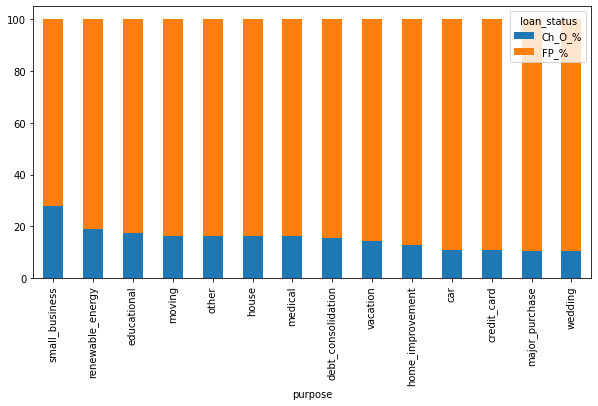

In [84]:
analyse_cat_param(df, 'purpose')

<span style= 'background:yellow'>Loan Purpose is coming out a key driver with purposes SMALL BUSINESS and showing higher delinquency ~18% higher than wedding, RENEWABLE ENERGY showing ~9% higher than wedding

<span style= 'background:yellow'>Small business can be further analyzed by slicing the income group. For that need to bucketize the income into groups

##### home_ownership and loan_status

loan_status     Charged Off  Fully Paid  Ch_O_%   FP_%
home_ownership                                        
OTHER                    17          76   18.28  81.72
RENT                   2773       15261   15.38  84.62
OWN                     434        2418   15.22  84.78
MORTGAGE               2194       13481   14.00  86.00


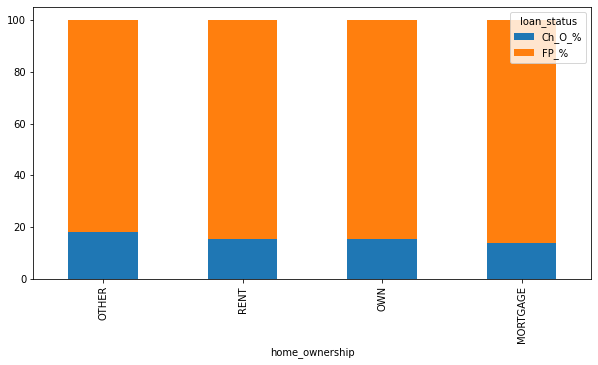

In [85]:
analyse_cat_param(df, 'home_ownership')

<span style= 'background:yellow'><b>Delinquency is higher in 'OTHER' home category</b>, but since the count is small compared to other categories, this cannot be taken as a directional input. Among other three categories MORTGAGE has lower chance of delinquency compared to RENT and OWN

##### Issue year of the loan and loan status

loan_status  Charged Off  Fully Paid  Ch_O_%   FP_%
issue_year                                         
2007                  41         189   17.83  82.17
2011                3143       16303   16.16  83.84
2008                 237        1252   15.92  84.08
2010                1430        9583   12.98  87.02
2009                 567        3909   12.67  87.33


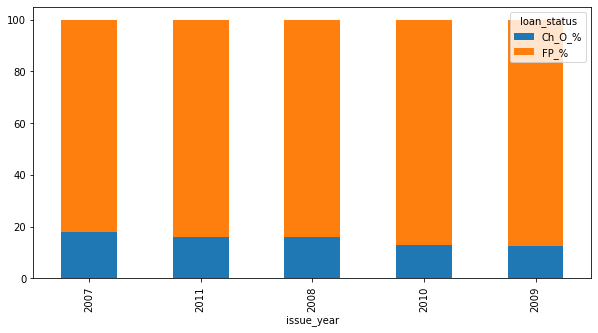

In [88]:
analyse_cat_param(df, 'issue_year')

<span style= 'background:yellow'>Though number of loans applied were highest in the year 2011, the deliquency rate is higher in 2007.

##### Grade and loan status

loan_status  Charged Off  Fully Paid  Ch_O_%   FP_%
grade                                              
G                     95         166   36.40  63.60
F                    289         597   32.62  67.38
E                    660        1788   26.96  73.04
D                   1080        3755   22.34  77.66
C                   1325        6156   17.71  82.29
B                   1376        9721   12.40  87.60
A                    593        9053    6.15  93.85


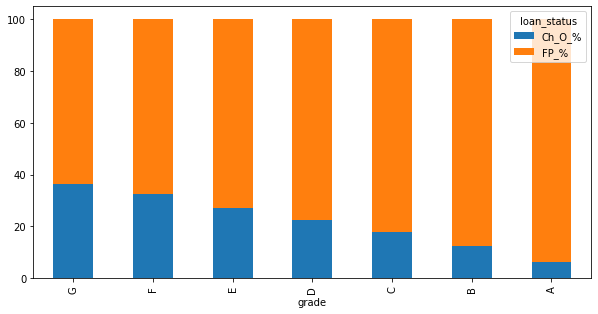

In [93]:
analyse_cat_param(df, 'grade')

<span style= 'background:yellow'>There is a difference of <b>~30%</b> deliquency rate in case of grade G and A. <b>People with grade G are highly likely to default.</b>

<span style= 'background:yellow'>This can be futher analysed with other features.

##### Address state and loan status

loan_status  Charged Off  Fully Paid  Ch_O_%   FP_%
addr_state                                         
NE                   3.0         2.0   60.00  40.00
NV                 103.0       354.0   22.54  77.46
ID                   1.0         4.0   20.00  80.00
SD                  12.0        50.0   19.35  80.65
AK                  13.0        58.0   18.31  81.69
FL                 485.0      2167.0   18.29  81.71
HI                  28.0       132.0   17.50  82.50
MO                 111.0       536.0   17.16  82.84
NM                  30.0       147.0   16.95  83.05
OR                  70.0       358.0   16.36  83.64
CA                1073.0      5488.0   16.35  83.65
MD                 156.0       810.0   16.15  83.85
GA                 208.0      1080.0   16.15  83.85
NJ                 269.0      1403.0   16.09  83.91
NH                  25.0       132.0   15.92  84.08
WA                 124.0       660.0   15.82  84.18
NC                 113.0       606.0   15.72  84.28
UT          

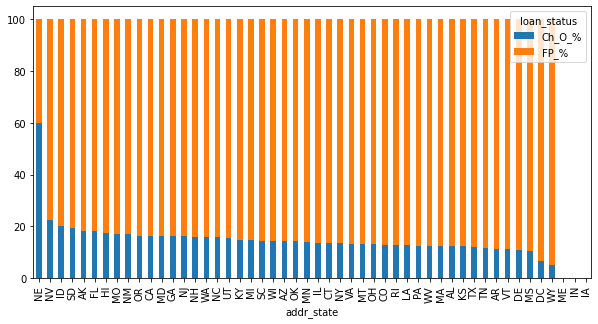

In [94]:
analyse_cat_param(df, 'addr_state')

<span style= 'background:yellow'>3/5 loans are delinquent in NE. Although the sample is very small, this is clearly an observation worth investigating further. 

#### Creating a common function to analyse numerical features

In [99]:
def analyse_num_param(df, param_name, bins, bin_labels):
    #for numerical feature it is most important to create bins first. These bins are then considered as categories 
    #and rest of the analysis is same as categorical feature
    df[param_name + '_bin'] = pd.cut(df[param_name], bins, labels=bin_labels)
    df_temp_pivot = pd.pivot_table(df, index=param_name + '_bin', columns='loan_status', values='member_id',  aggfunc='count').reset_index()
    df_temp_pivot['Ch_O_%'] = round((df_temp_pivot['Charged Off']/( df_temp_pivot['Fully Paid']+ df_temp_pivot['Charged Off'])*100),2)
    df_temp_pivot['FP_%'] = round((df_temp_pivot['Fully Paid']/( df_temp_pivot['Fully Paid']+ df_temp_pivot['Charged Off'])*100),2)
    df_temp_pivot.set_index(param_name + '_bin')
    df_temp_pivot=df_temp_pivot.groupby(by=param_name+'_bin').sum().sort_values(by=['Ch_O_%'], ascending = False)
    print(df_temp_pivot)
    df_temp_pivot[['Ch_O_%', 'FP_%']].plot.bar(stacked = True, figsize=(10, 5))

##### dti and loan status

loan_status  Charged Off  Fully Paid  Ch_O_%   FP_%
dti_bin                                            
20-25               1103        5355   17.08  82.92
15-20               1346        7182   15.78  84.22
10-15               1348        7819   14.70  85.30
25-30                 87         528   14.15  85.85
5-10                 945        6321   13.01  86.99
0-5                  589        4031   12.75  87.25


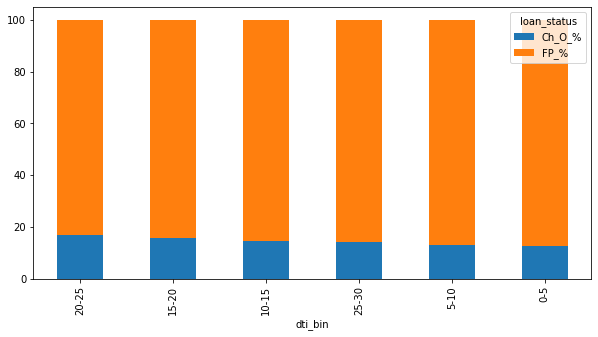

In [101]:
analyse_num_param(df, 'dti', [-1,5,10,15,20,25,30], ['0-5', '5-10', '10-15', '15-20', '20-25', '25-30'])

<span style= 'background:yellow'> There is no big difference to draw any observations

##### loan issue year and loan status

loan_status     Charged Off  Fully Paid  Ch_O_%   FP_%
issue_year_bin                                        
2007                     41         189   17.83  82.17
2011                   3143       16303   16.16  83.84
2008                    237        1252   15.92  84.08
2010                   1430        9583   12.98  87.02
2009                    567        3909   12.67  87.33


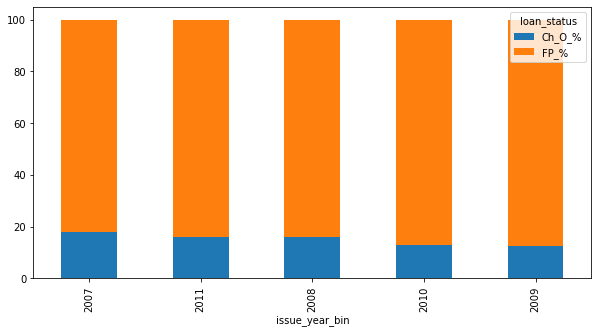

In [104]:
analyse_num_param(df, 'issue_year', [2006,2007,2008,2009,2010,2011], ['2007', '2008', '2009', '2010', '2011'])

<span style= 'background:yellow'> There is no big difference to draw any observations

##### issue month and loan status

loan_status      Charged Off  Fully Paid  Ch_O_%   FP_%
issue_month_bin                                        
12                       656        3363   16.32  83.68
5                        453        2335   16.25  83.75
9                        533        2758   16.20  83.80
10                       546        2987   15.45  84.55
6                        461        2547   15.33  84.67
11                       580        3240   15.18  84.82
7                        457        2739   14.30  85.70
8                        450        2765   14.00  86.00
1                        311        1957   13.71  86.29
4                        360        2353   13.27  86.73
3                        329        2223   12.89  87.11
2                        282        1969   12.53  87.47


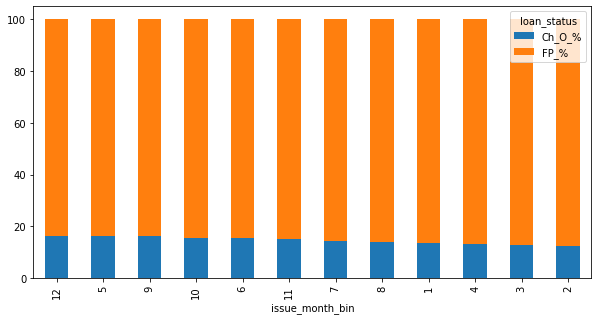

In [106]:
analyse_num_param(df, 'issue_month', [0,1,2,3,4,5,6,7,8,9,10,11,12], ['1','2','3','4','5','6','7','8','9','10','11','12'])

<span style= 'background:yellow'> There is no big difference to draw any observations

##### Annual income and loan status

First we need to find out bins for annual income

In [112]:
pd.cut(df.annual_inc, bins=8)

0          (21000.5, 38001.0]
1          (21000.5, 38001.0]
2         (3863.996, 21000.5]
3          (38001.0, 55001.5]
5          (21000.5, 38001.0]
                 ...         
39711      (72002.0, 89002.5]
39712    (106003.0, 123003.5]
39713     (3863.996, 21000.5]
39714     (89002.5, 106003.0]
39716      (21000.5, 38001.0]
Name: annual_inc, Length: 36654, dtype: category
Categories (8, interval[float64, right]): [(3863.996, 21000.5] < (21000.5, 38001.0] < (38001.0, 55001.5] < (55001.5, 72002.0] < (72002.0, 89002.5] < (89002.5, 106003.0] < (106003.0, 123003.5] < (123003.5, 140004.0]]

loan_status     Charged Off  Fully Paid  Ch_O_%   FP_%
annual_inc_bin                                        
<21k                    265        1082   19.67  80.33
21k-38k                1203        5572   17.76  82.24
38-55k                 1554        8413   15.59  84.41
55k-72k                1106        6570   14.41  85.59
72k-89k                 610        4127   12.88  87.12
106k-123k               199        1574   11.22  88.78
123k-140k               122         983   11.04  88.96
89k-106k                357        2905   10.94  89.06


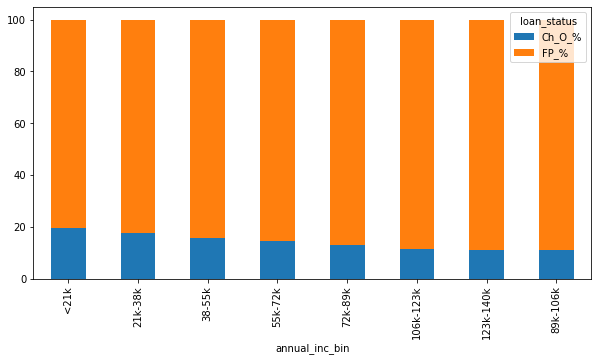

In [113]:
analyse_num_param(df, 'annual_inc', [3800,21000,38000,55000,72000,89000,106000,123000,140000], ['<21k','21k-38k','38-55k','55k-72k','72k-89k','89k-106k','106k-123k','123k-140k'])

<span style= 'background:yellow'>~9% higher delinquency in lower income group (<21k) compared to the lowest group - 89k-106k income group of 10.94%

##### Interest rate and loan status

In [114]:
pd.cut(df.int_rate, bins=8)

0        (10.165, 12.537]
1         (14.91, 17.282]
2         (14.91, 17.282]
3         (12.537, 14.91]
5         (7.792, 10.165]
               ...       
39711     (7.792, 10.165]
39712     (7.792, 10.165]
39713    (10.165, 12.537]
39714     (7.792, 10.165]
39716     (12.537, 14.91]
Name: int_rate, Length: 36654, dtype: category
Categories (8, interval[float64, right]): [(5.401, 7.792] < (7.792, 10.165] < (10.165, 12.537] < (12.537, 14.91] < (14.91, 17.282] < (17.282, 19.655] < (19.655, 22.027] < (22.027, 24.4]]

loan_status   Charged Off  Fully Paid  Ch_O_%   FP_%
int_rate_bin                                        
22.02-24.4             63          69   47.73  52.27
19.65-22.02           277         461   37.53  62.47
17.28-19.65           570        1371   29.37  70.63
14.91-17.28          1095        3755   22.58  77.42
12.53-14.91          1364        6589   17.15  82.85
10.16-12.53          1228        7928   13.41  86.59
7.79-10.16            482        4937    8.89  91.11
<7.79                 339        6126    5.24  94.76


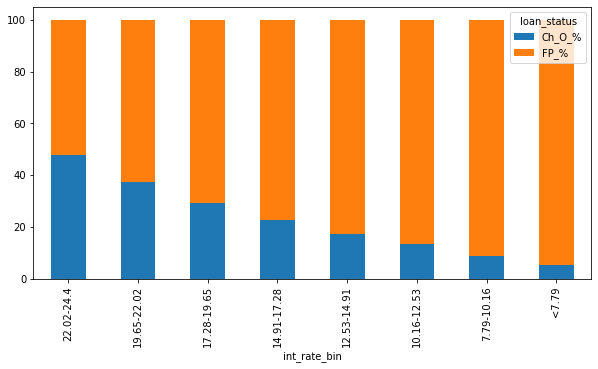

In [115]:
analyse_num_param(df, 'int_rate', [5.4,7.79,10.16,12.53,14.91,17.28,19.65,22.02,24.4], ['<7.79','7.79-10.16','10.16-12.53','12.53-14.91','14.91-17.28','17.28-19.65','19.65-22.02','22.02-24.4'])

<span style= 'background:yellow'>As expected, the rate of delinquency increases wiht increase in interest rate.

# <span style="background: green; color: white; padding: 5px"> Multivariate analysis

##### Grade G, sub grade and loan status

loan_status  Charged Off  Fully Paid  Ch_O_%   FP_%
sub_grade                                          
G3                    19          21   47.50  52.50
G5                     9          13   40.91  59.09
G2                    26          40   39.39  60.61
G1                    30          58   34.09  65.91
G4                    11          34   24.44  75.56


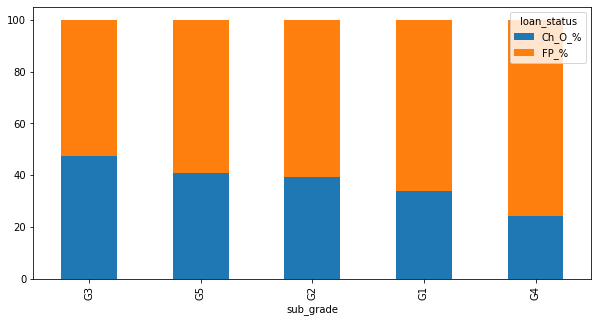

In [90]:
analyse_cat_param(df[df.grade == 'G'], 'sub_grade')

<span style= 'background:yellow'>People with sub <b>grade G3</b> are mostly highly likly to be defaulters.

##### Grade G, purpose and loan status

loan_status         Charged Off  Fully Paid  Ch_O_%   FP_%
purpose                                                   
medical                     2.0         1.0   66.67  33.33
car                         1.0         1.0   50.00  50.00
house                       2.0         2.0   50.00  50.00
wedding                     2.0         2.0   50.00  50.00
other                       8.0         9.0   47.06  52.94
small_business             20.0        25.0   44.44  55.56
debt_consolidation         53.0        90.0   37.06  62.94
moving                      1.0         2.0   33.33  66.67
major_purchase              1.0         3.0   25.00  75.00
credit_card                 3.0        17.0   15.00  85.00
home_improvement            1.0        12.0    7.69  92.31
educational                 0.0         1.0    0.00   0.00
renewable_energy            1.0         0.0    0.00   0.00
vacation                    0.0         1.0    0.00   0.00


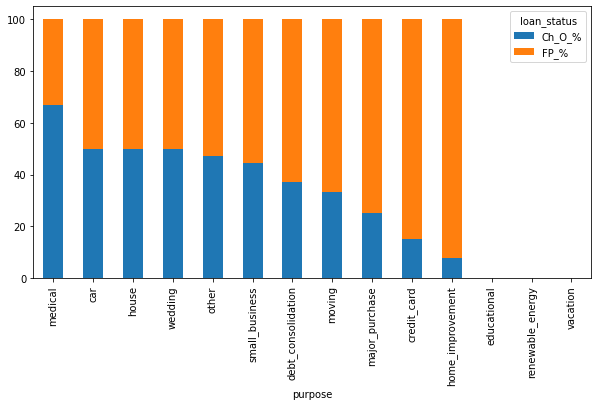

In [91]:
analyse_cat_param(df[df.grade == 'G'], 'purpose')

<span style= 'background:yellow'>People with grade G who take loan for <b>medical purpose</b> have 66.67% chances of being defaulters.
<span style= 'background:yellow'>It is also interesting to see there are no loan for the purpose of education, renewable energy and vacations.

##### Grade G, annual income and loan status

loan_status     Charged Off  Fully Paid  Ch_O_%   FP_%
annual_inc_bin                                        
21k-38k                  14          10   58.33  41.67
<21k                      2           2   50.00  50.00
72k-89k                  18          26   40.91  59.09
38-55k                   18          28   39.13  60.87
55k-72k                  21          34   38.18  61.82
106k-123k                10          24   29.41  70.59
89k-106k                  9          28   24.32  75.68
123k-140k                 3          14   17.65  82.35


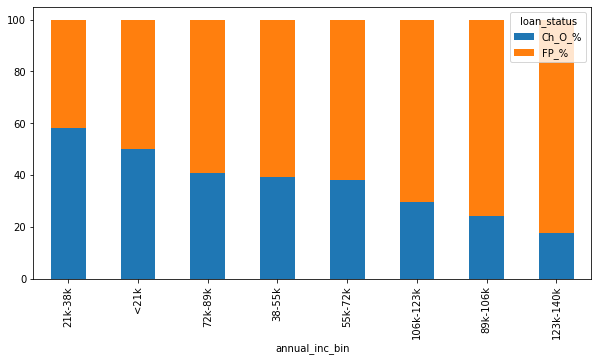

In [123]:
analyse_cat_param(df[df.grade == 'G'], 'annual_inc_bin')

<span style= 'background:yellow'> Annual income group between <b>21k and 38k</b> and group G have 3/5 changes of being defaulters

##### Grade G, annual income = 21k-38k, interest rate and loan status

loan_status   Charged Off  Fully Paid  Ch_O_%    FP_%
int_rate_bin                                         
22.02-24.4              5           2   71.43   28.57
19.65-22.02             9           7   56.25   43.75
<7.79                   0           0    0.00    0.00
7.79-10.16              0           0    0.00    0.00
10.16-12.53             0           0    0.00    0.00
12.53-14.91             0           0    0.00    0.00
14.91-17.28             0           0    0.00    0.00
17.28-19.65             0           1    0.00  100.00


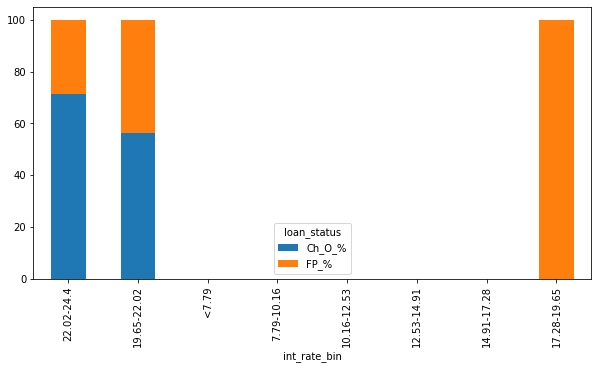

In [129]:
analyse_cat_param(df[(df.grade == 'G')&(df.annual_inc_bin == '21k-38k')], 'int_rate_bin')

<span style="background:yellow">The delinquency rate for grade G and annual income between 21k-38k is ~71% for highest interest rate. Where are it is 0% for lower interest rate.<br>

# <span style="background: green; color: white; padding: 5px">Observations and recommendations

<b>Key influencer attributes are:
<ul><li>Purpose
<li>Annual Income
<li>State
<li>Grade
<li>Interest rate

<b>Recommendation
<ul><li>A risk model to be developed based on these attributes with a base interest rate. 
<li>Based on the risk model, add on interest rates are added to the base interest rate to compensate for delinquency risk. 